# ***Project Title:-*** **Credit Card Default Prediction**
### ***Domain:-*** Banking
# Credit Card Default Prediction

**Problem Statement:** Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
biggest threats faces by commercial banks is the risk prediction of credit clients. The
goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history

**Content**

**There are 25 variables:**

1. **ID:** ID of each client
2. **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. **SEX:** Gender (1=male, 2=female)
4. **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
6. **AGE:** Age in years
7. **PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. **PAY_2:** Repayment status in August, 2005 (scale same as above)
9. **PAY_3:** Repayment status in July, 2005 (scale same as above)
10. **PAY_4:** Repayment status in June, 2005 (scale same as above)
11. **PAY_5:** Repayment status in May, 2005 (scale same as above)
12. **PAY_6:** Repayment status in April, 2005 (scale same as above)
13. **BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)
14. **BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)
15. **BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)
16. **BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)
17. **BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)
18. **BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)
19. **PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)
20. **PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)
21. **PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)
22. **PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)
23. **PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)
24. **PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)
25. **default.payment.next.month:** Default payment (1=yes, 0=no)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
df = pd.read_csv("D:\\Machine learning\\ML-Project\\CreditCard_default_prediction\\Datasets\\UCI_Credit_Card.csv")

In [34]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- The dataset contains information about 30,000 credit card holders.
- There are 25 variables in the dataset, including the target variable (default.payment.next.month).
- The variables include demographic information (e.g., age, gender, education), credit card usage information (e.g., amount of credit, bill amount, payment amount), and repayment history (e.g., PAY_0, PAY_2, PAY_3).
- The target variable indicates whether the credit card holder defaulted on their payment in the next month.
- The dataset is clean, with no missing values

In [36]:
df.shape

(30000, 25)

In [37]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [39]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [40]:
df.duplicated().sum()

0

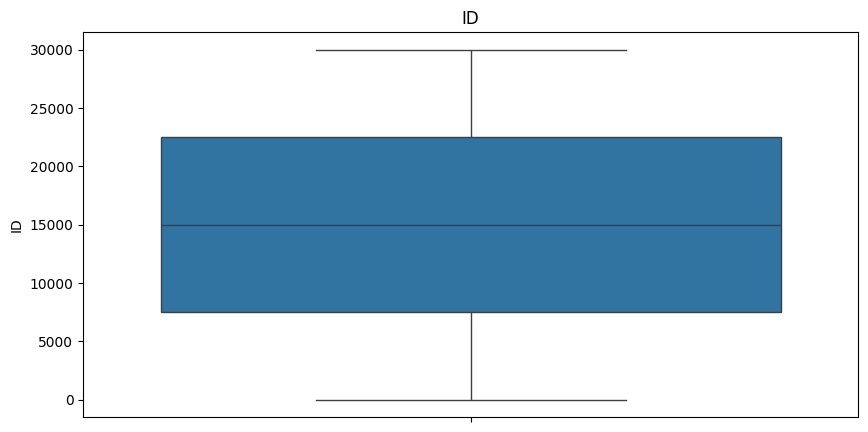

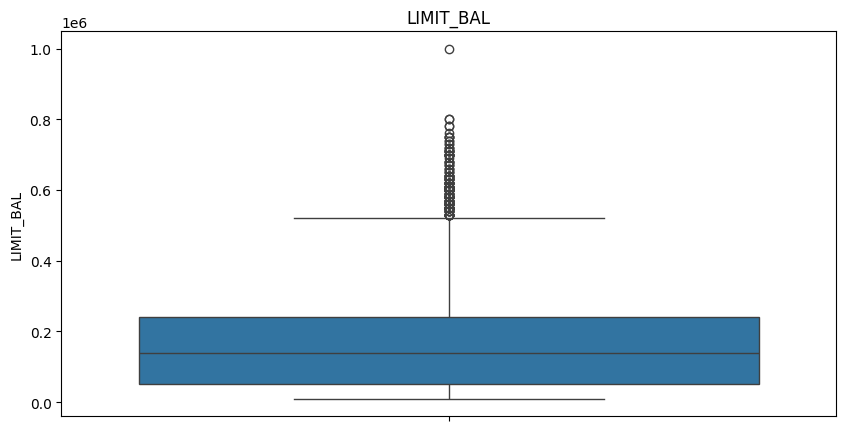

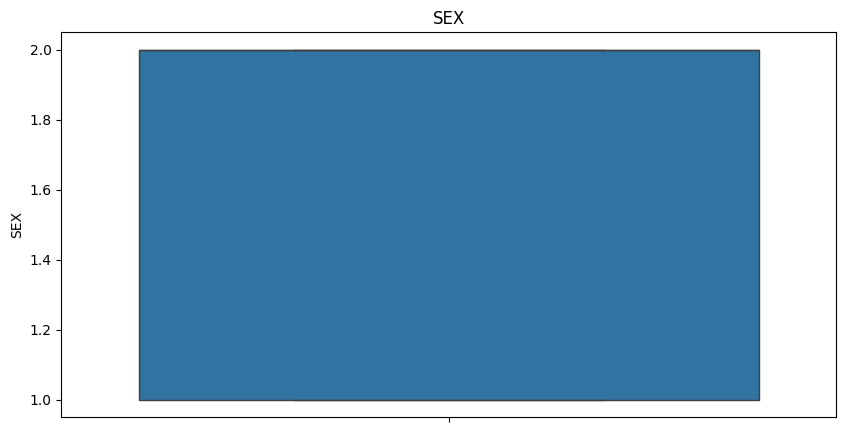

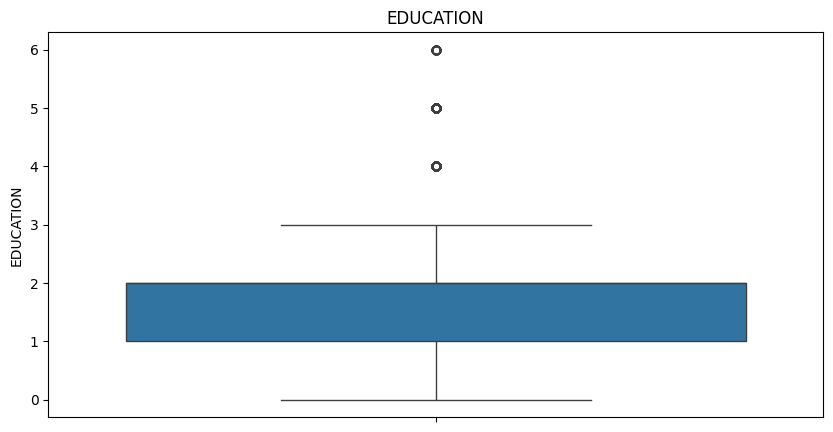

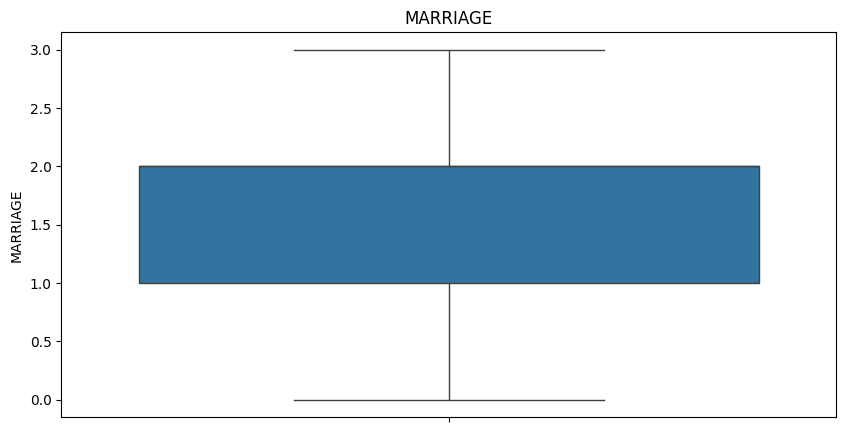

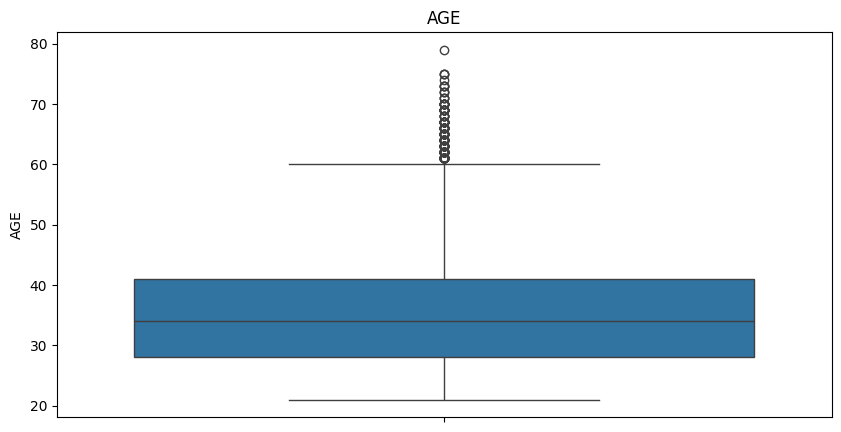

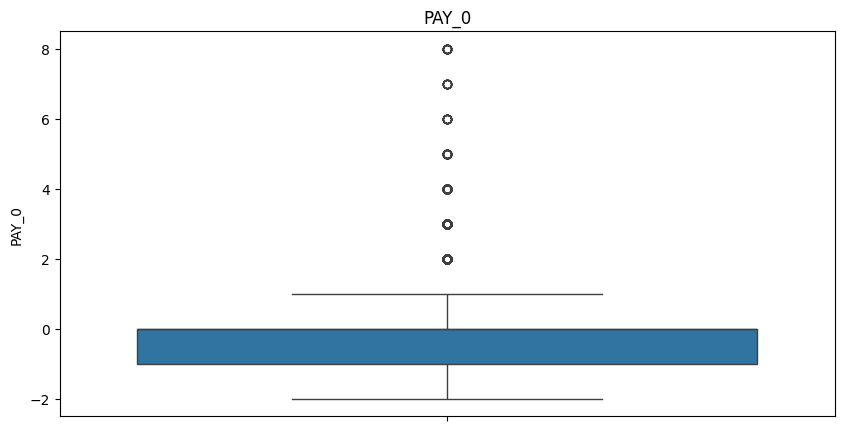

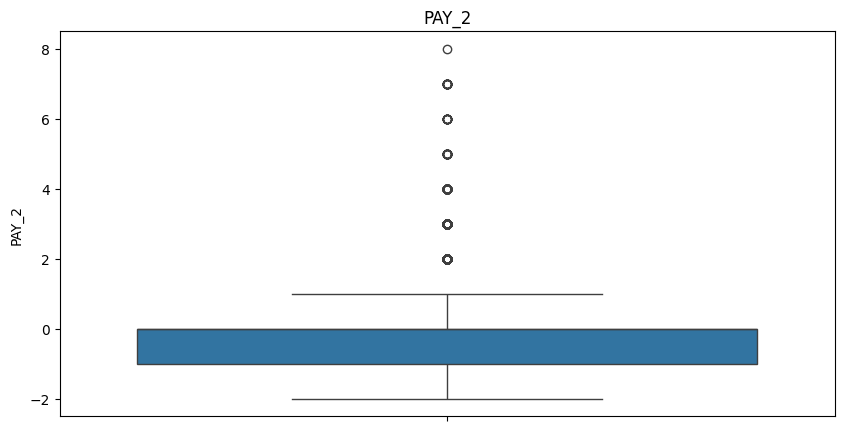

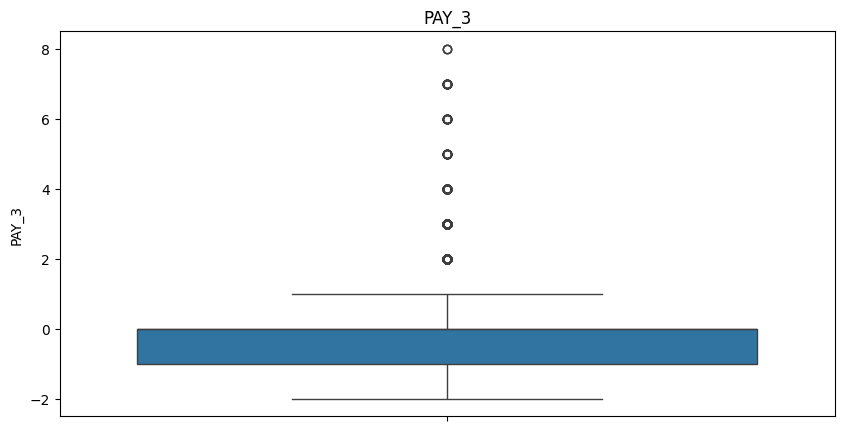

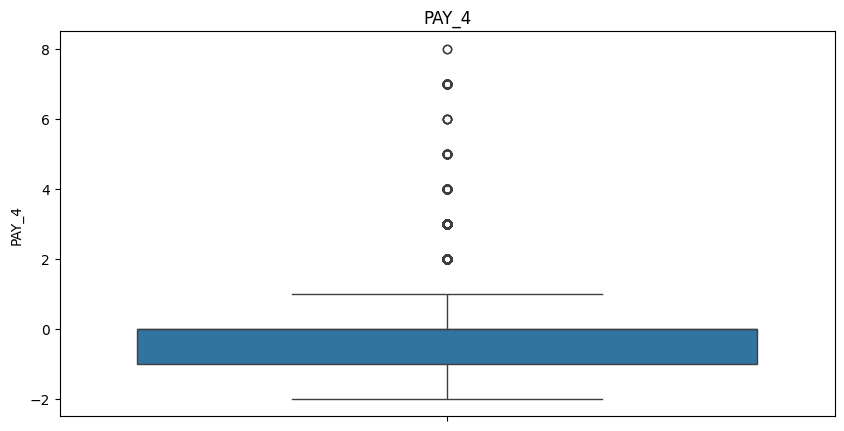

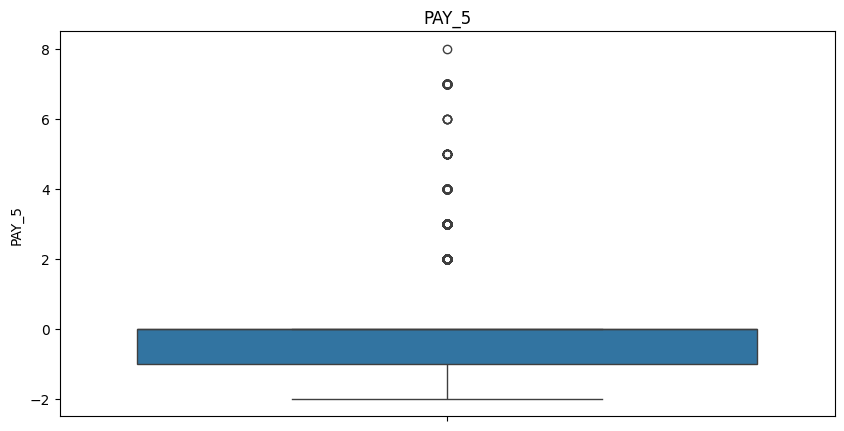

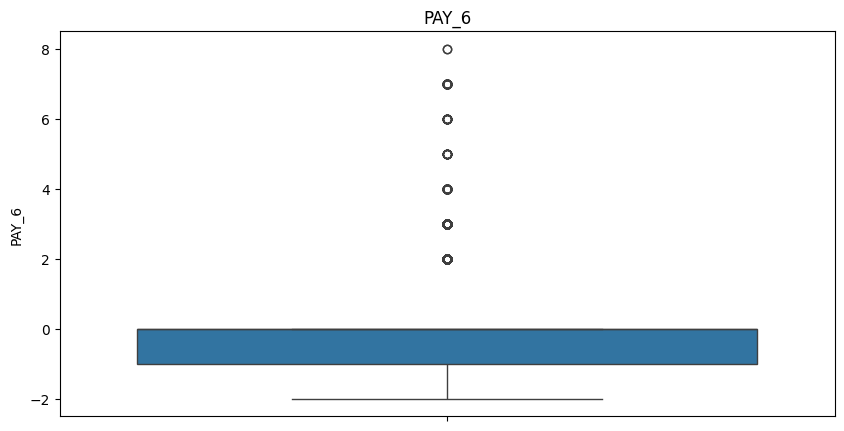

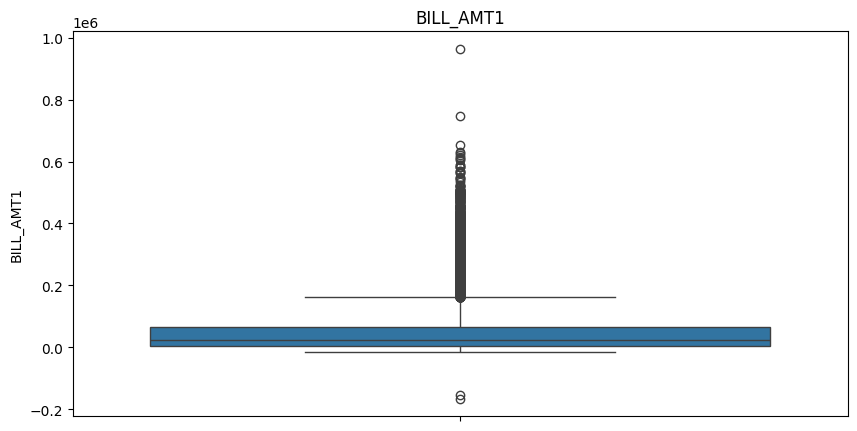

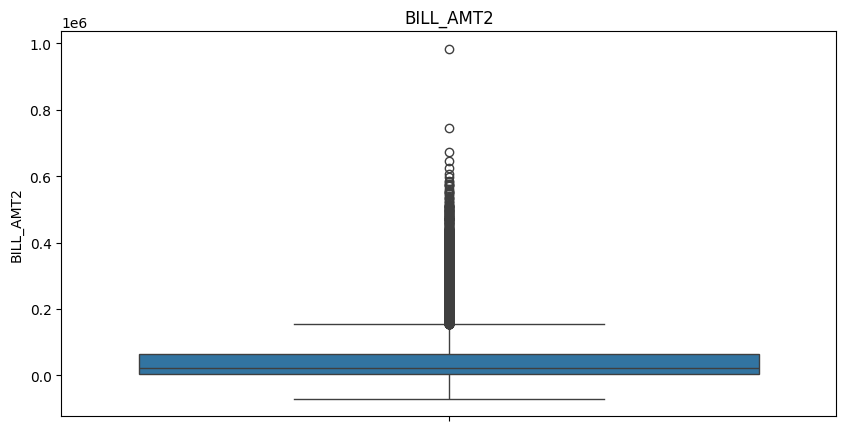

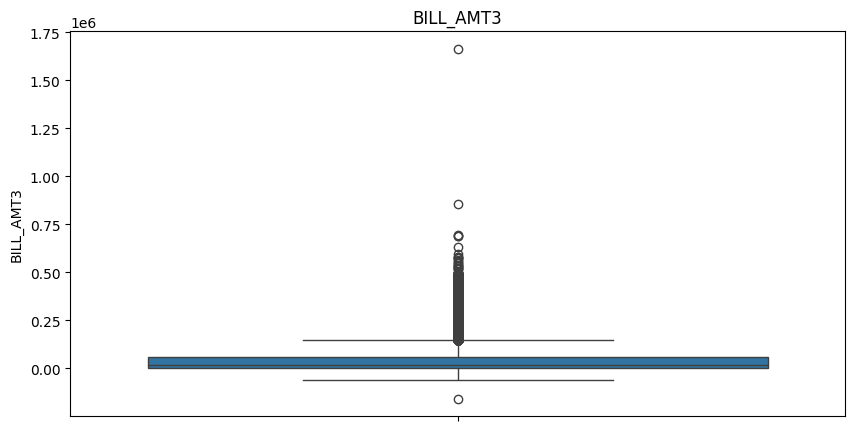

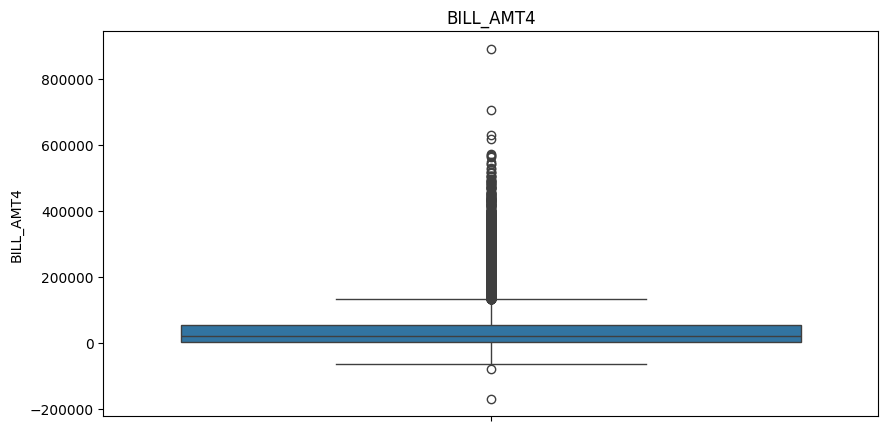

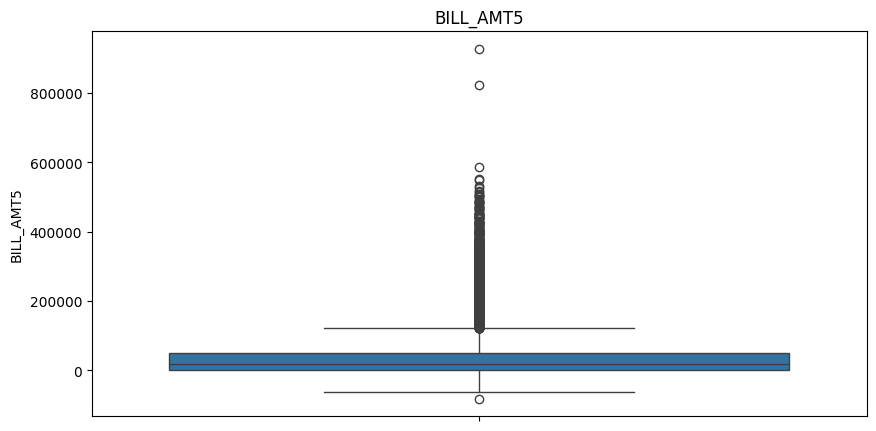

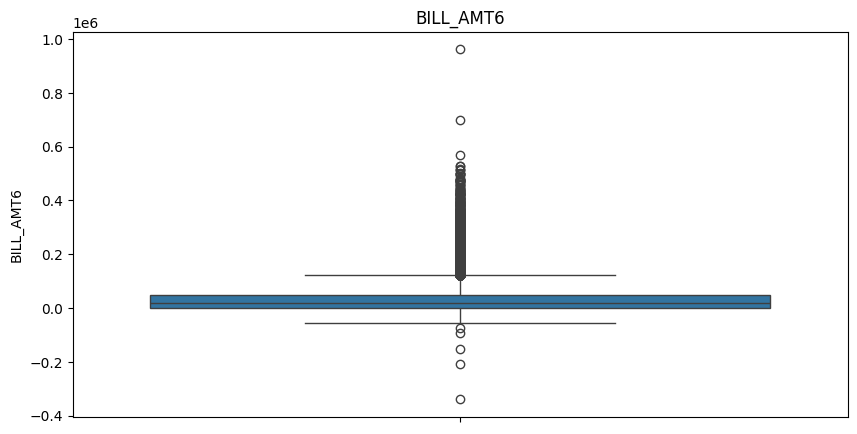

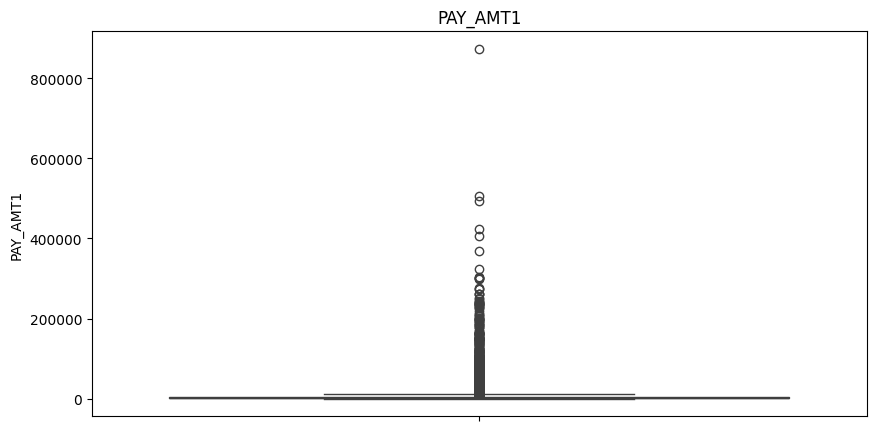

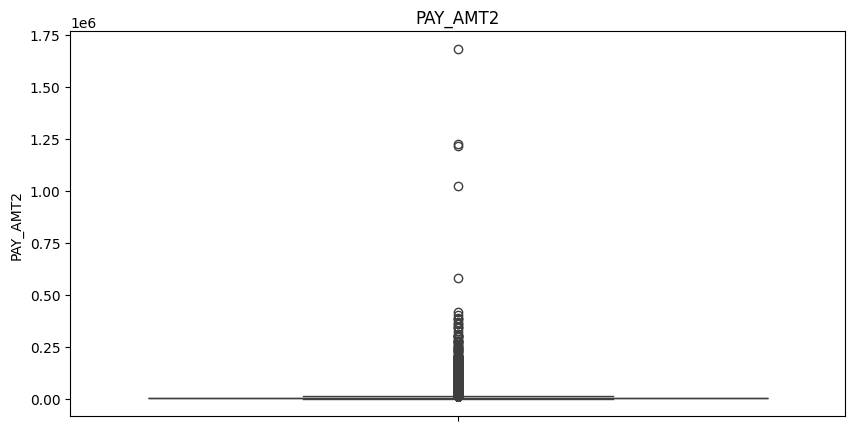

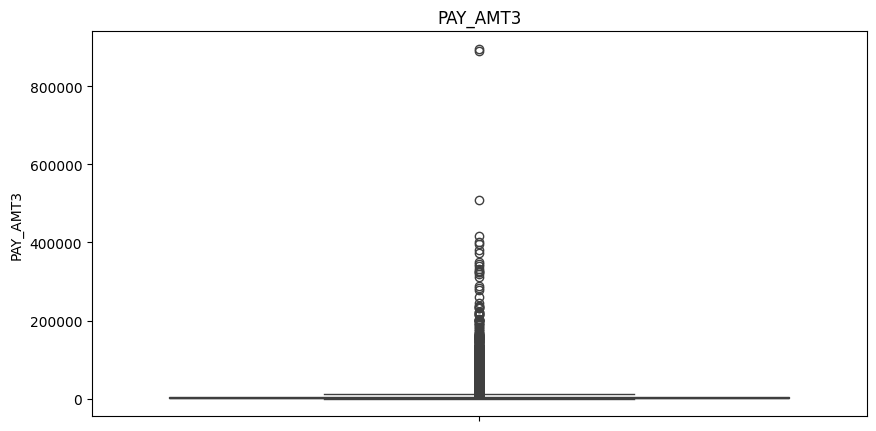

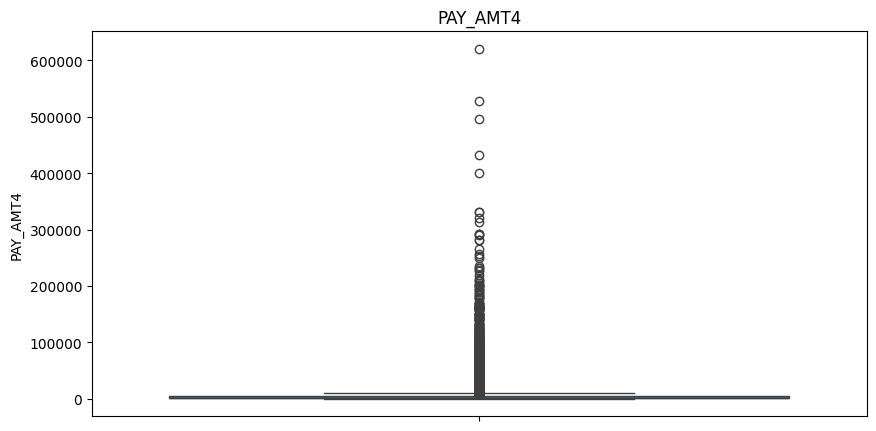

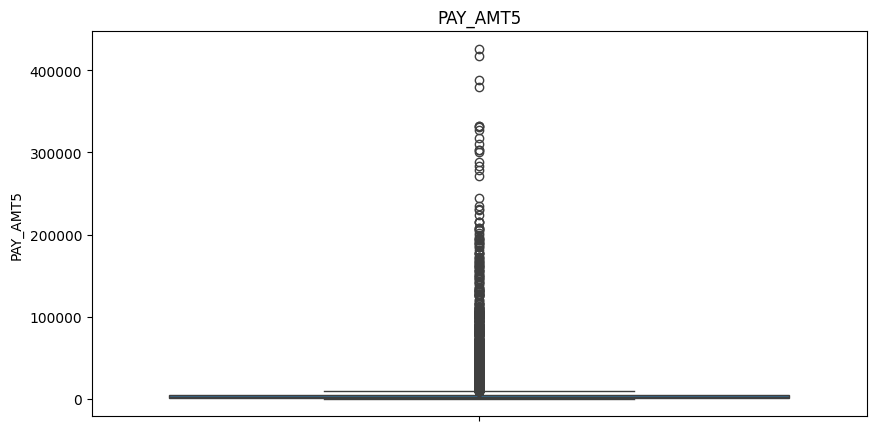

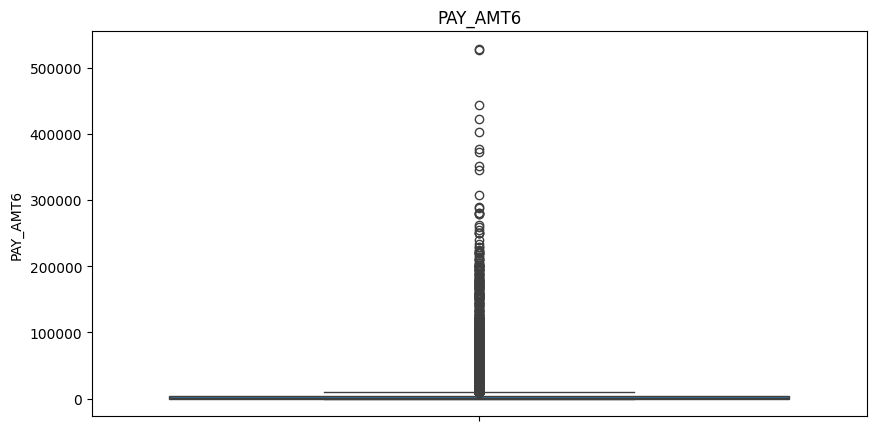

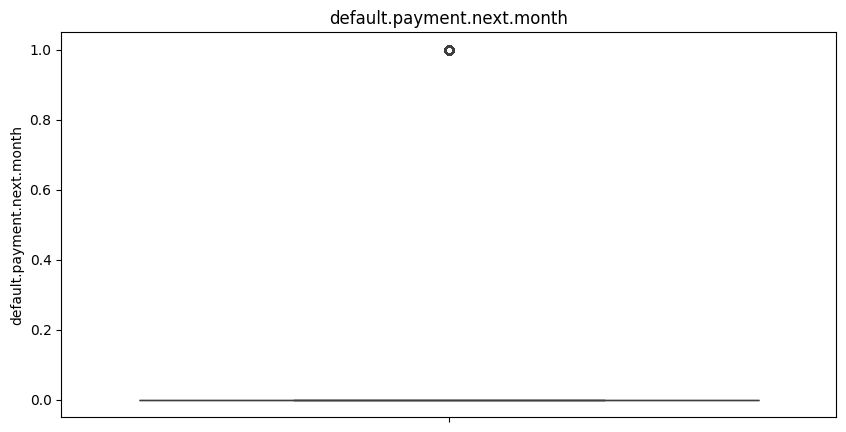

In [41]:
# check Outliers in Dataset
for i in df.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

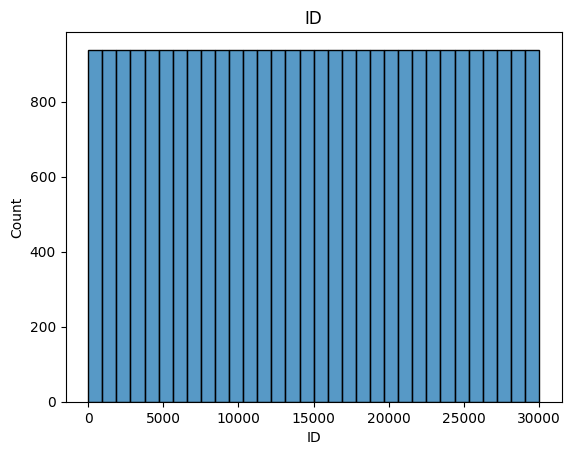

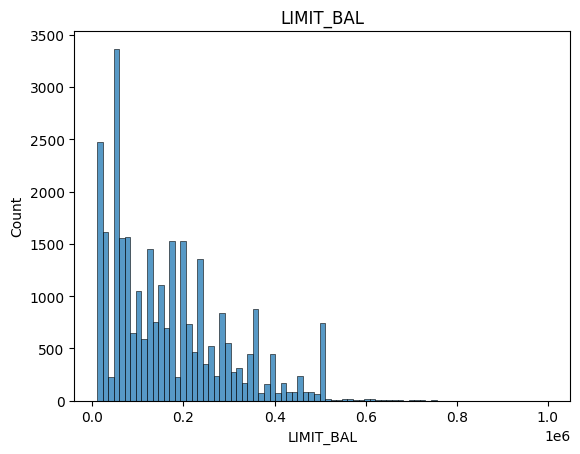

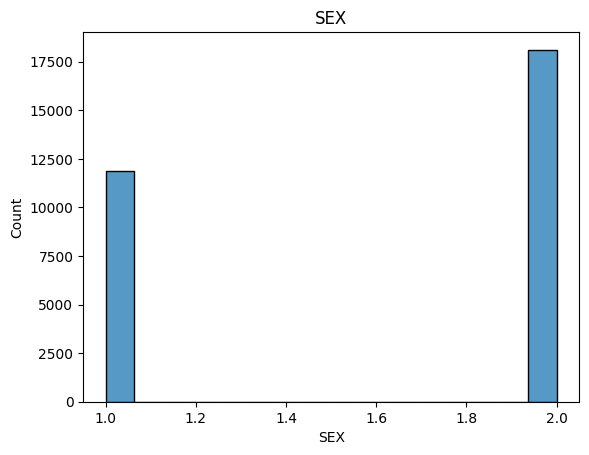

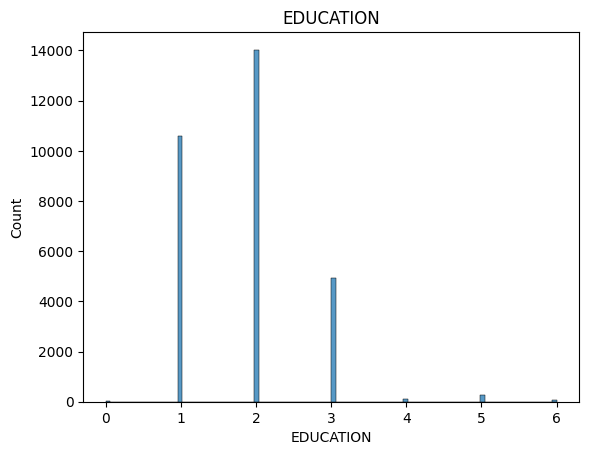

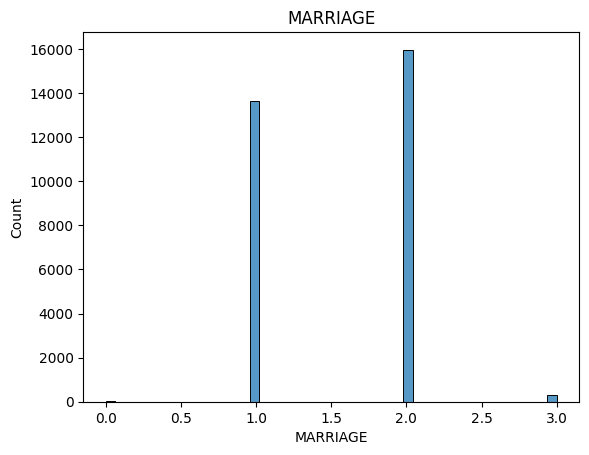

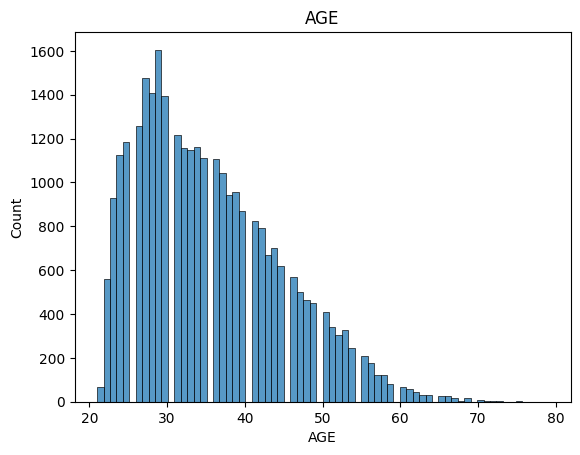

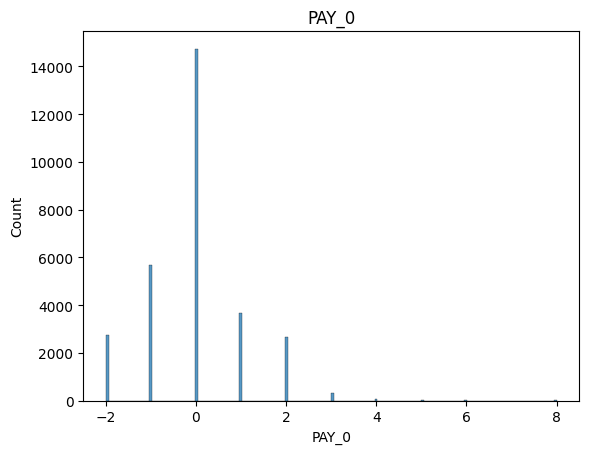

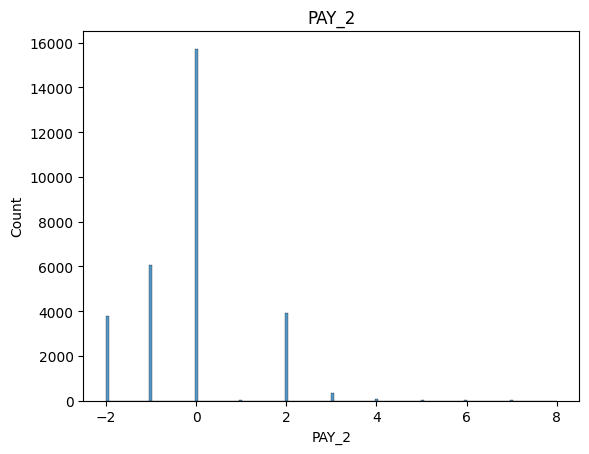

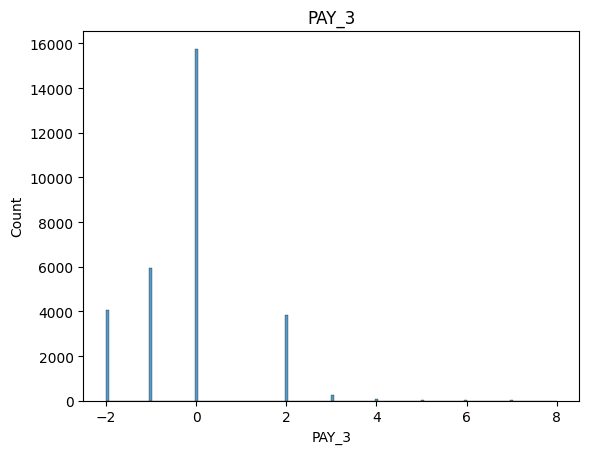

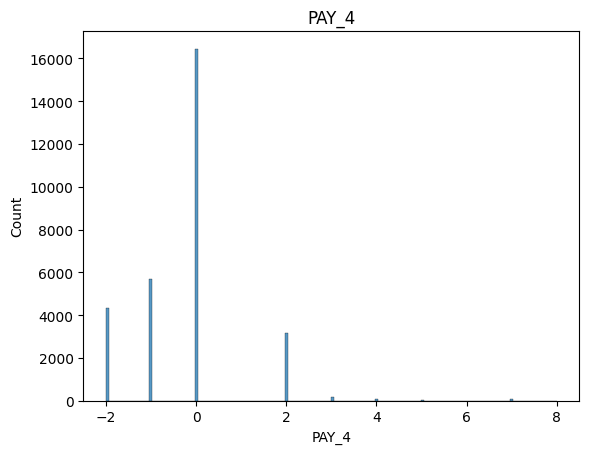

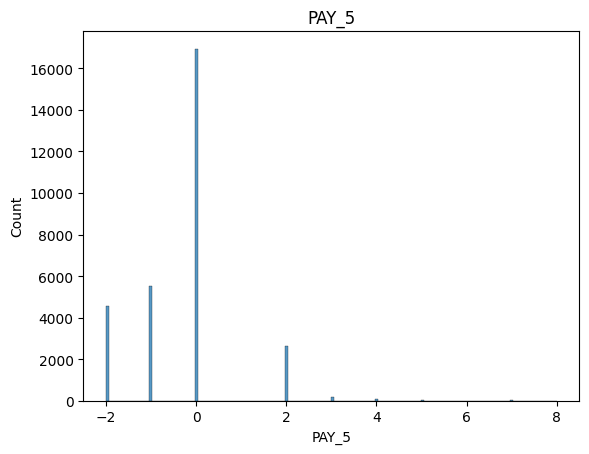

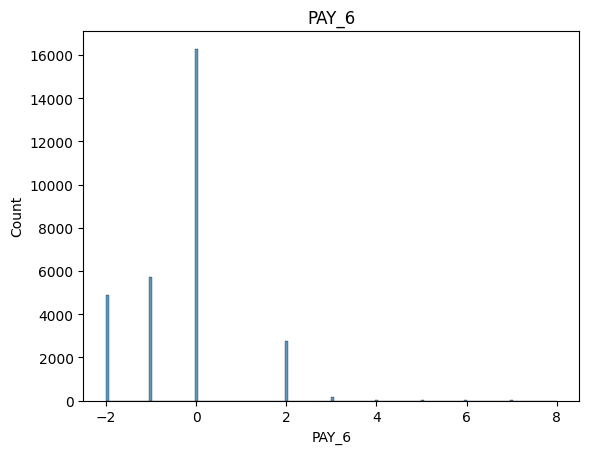

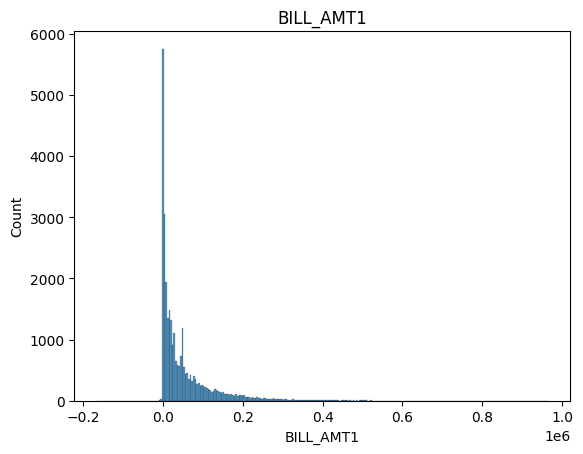

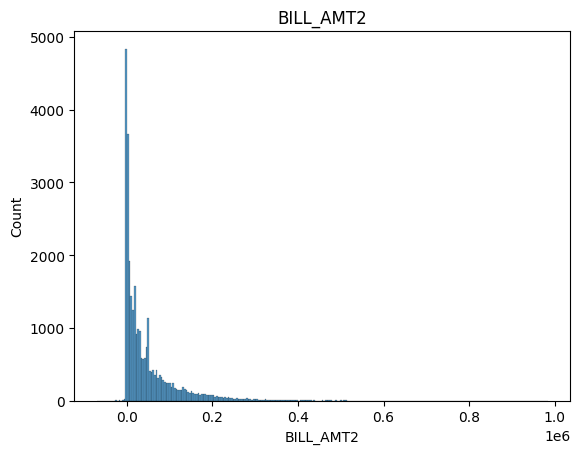

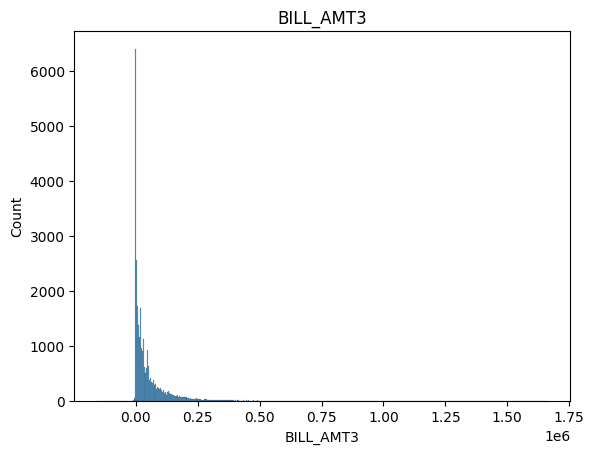

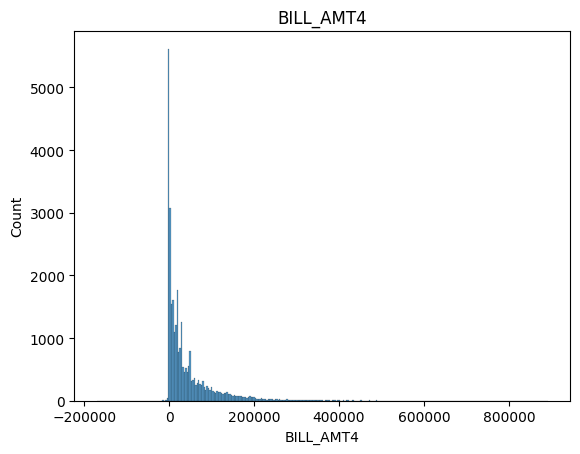

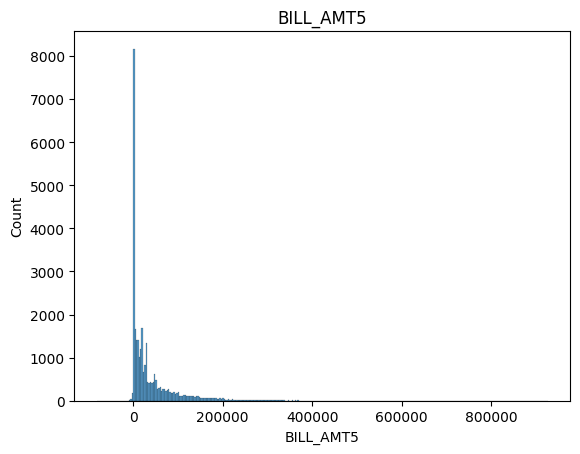

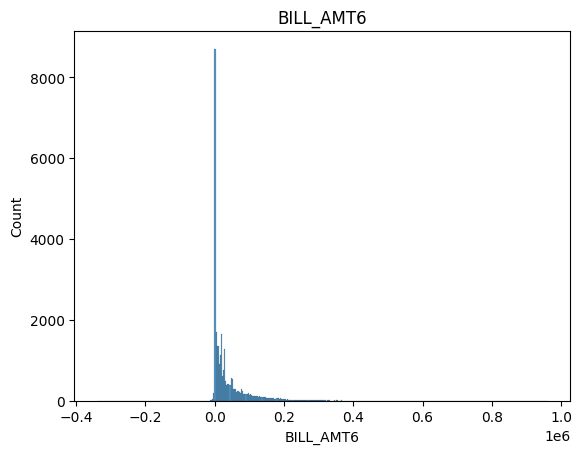

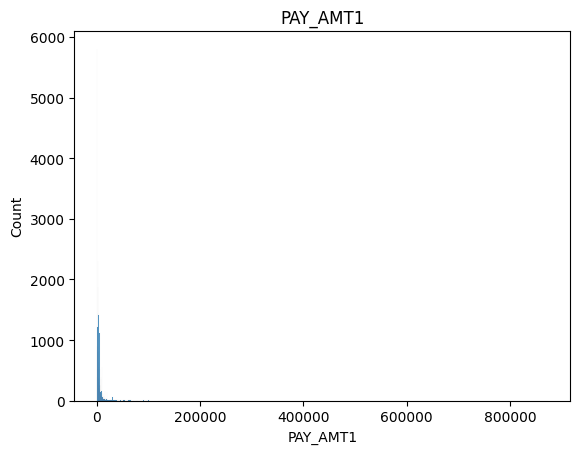

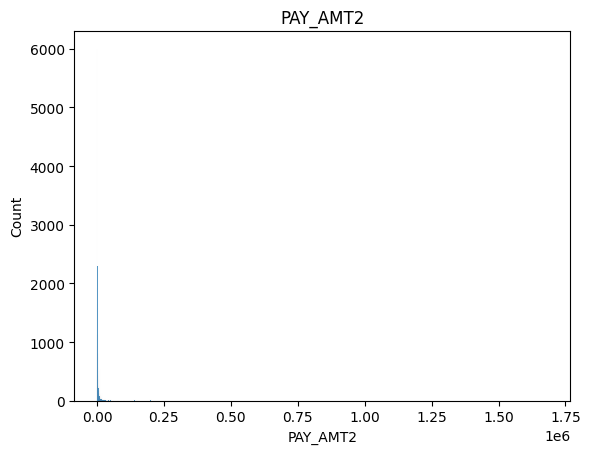

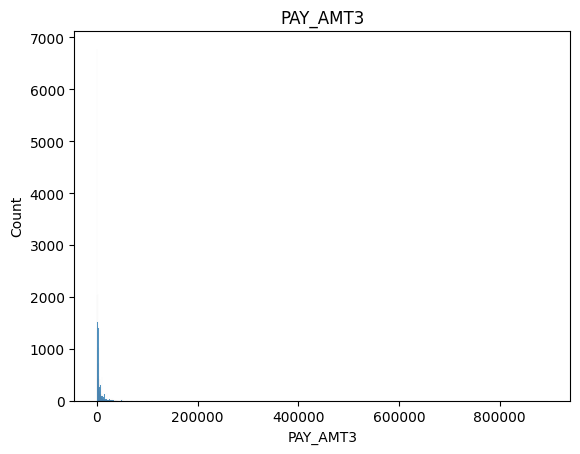

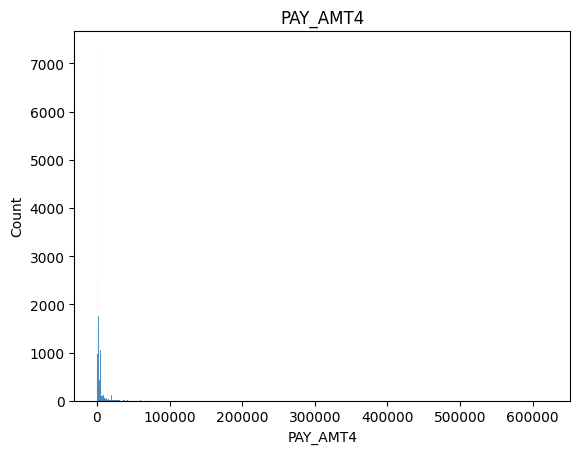

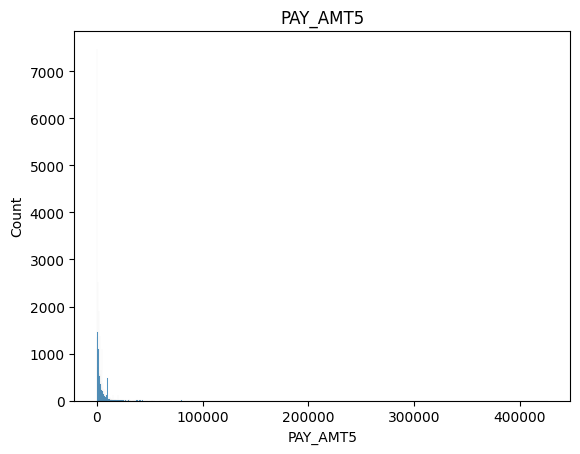

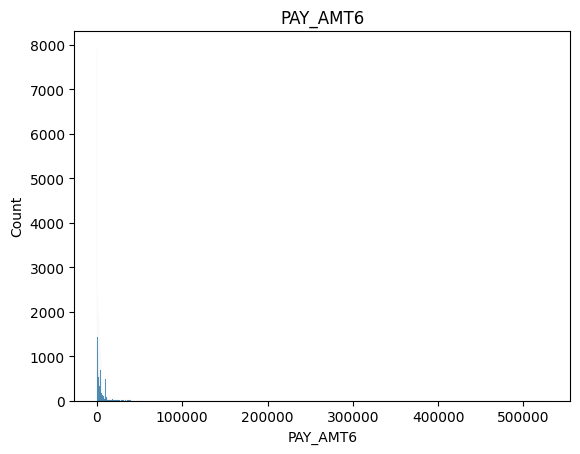

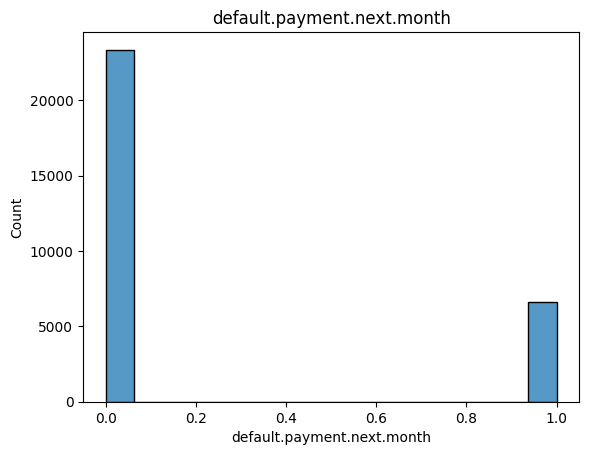

In [42]:
for i in df.columns:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

In [43]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


In [47]:
# Split the Dataset into X and y
X = df.drop(columns=['ID','default.payment.next.month'], axis=1)
y = df['default.payment.next.month']

In [48]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape, X_test.shape

((24000, 23), (6000, 23))

In [51]:
y_train.shape, y_test.shape

((24000,), (6000,))

In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [54]:
y_pred = Lr.predict(X_test)

In [55]:
from sklearn.metrics import *
print('Test Accuracy Score ',accuracy_score(y_test,y_pred))
print("Confusion_Metric",confusion_matrix(y_test,y_pred))
print('Classification_report',classification_report(y_test,y_pred))
print('R2_Score',r2_score(y_test,y_pred))

Test Accuracy Score  0.6845
Confusion_Metric [[3247 1440]
 [ 453  860]]
Classification_report               precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.65      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.68      0.71      6000

R2_Score -0.8456195622024003


In [56]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=42)

In [57]:
y_pred_rf = rf.predict(X_test)

print('Classification Report',classification_report(y_test,y_pred_rf))
print('Accuracy Score',accuracy_score(y_test,y_pred_rf))
print('R2 Score',r2_score(y_test,y_pred_rf))

Classification Report               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.46      0.50      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000

Accuracy Score 0.7938333333333333
R2 Score -0.20603877361033773


In [58]:
import xgboost as xgb
clf = xgb.XGBClassifier(scale_pos_weight=len(y_train_sm[y_train_sm == 0]) / len(y_train_sm[y_train_sm == 1]), random_state=42)
clf.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [59]:
y_pred_xgb = clf.predict(X_test)

print('Classification Report',classification_report(y_test,y_pred_xgb))
print('Accuracy Score',accuracy_score(y_test,y_pred_xgb))
print('R2 Score',r2_score(y_test,y_pred_xgb))

Classification Report               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4687
           1       0.59      0.43      0.50      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.67      0.69      6000
weighted avg       0.79      0.81      0.80      6000

Accuracy Score 0.8098333333333333
R2 Score -0.11244158503588952


In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost classifier
clf = xgb.XGBClassifier(scale_pos_weight=len(y_train_sm[y_train_sm == 0]) / len(y_train_sm[y_train_sm == 1]), random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_sm, y_train_sm)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
y_pred_prob = best_clf.predict_proba(X_test)[:, 1]

print('accuracy:',accuracy_score(y_test, y_pred))
print('conf_matrix:',confusion_matrix(y_test, y_pred))
print('class_report:',classification_report(y_test, y_pred))
print('R2 Score:',r2_score(y_test,y_pred_prob))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.8}
accuracy: 0.7981666666666667
conf_matrix: [[4226  461]
 [ 750  563]]
class_report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87      4687
           1       0.55      0.43      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.67      0.68      6000
weighted avg       0.78      0.80      0.79      6000

R2 Score: 0.13605672121047974


In [61]:
import joblib

# Save the model to a file
joblib.dump(best_clf, 'xgboost_model.pkl')
print("Model saved as xgboost_model.pkl")

Model saved as xgboost_model.pkl


In [30]:
import pickle

pickle.dumps(best_clf,'xgboost_model.pkl')
print('saved...')

TypeError: 'str' object cannot be interpreted as an integer

In [31]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')